<a href="https://colab.research.google.com/github/hellocrisel/data-science/blob/main/Project_Foundations_for_Data_Science_FoodHub_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Foundations for Data Science: FoodHub Data Analysis
##Context
The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

##Objective
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

##Data Description
The data contains the different data related to a food order. The detailed data dictionary is given below.

##Data Dictionary
order_id: Unique ID of the order
customer_id: ID of the customer who ordered the food
restaurant_name: Name of the restaurant
cuisine_type: Cuisine ordered by the customer
cost: Cost of the order
day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
rating: Rating given by the customer out of 5
food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information



##Importing the Required Libraries

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Understanding the Structure of the data.

In [ ]:
# Read the data
df = pd.read_csv("/content/drive/MyDrive/Saldivar_MIT Data Science /foodhub_order.csv")
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


###Observations
The DataFrame has 9 columns as mentioned in the data Dictionary. Data in each row corresponds to the order placed by a customer.

**Question** 1: How many rows and columns are present in the data?

In [ ]:
# Check the shape of the dataset
df.shape

(1898, 9)


*   The dataset has 1898 rows and 9 columns.

Question 2: What are the datatypes of the different columns in the dataset?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


###Observations:
There are 1 float, 4 integers and 4 objects. The Rating column has the wrong data type. Order ID, and Customer ID are also categorical variables with numerical labels.

Question 3: Are there any missing values in the data? If yes, treat them using an appropriate method.

In [ ]:
# Checking for missing values in the data
df.isnull()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1893,False,False,False,False,False,False,False,False,False
1894,False,False,False,False,False,False,False,False,False
1895,False,False,False,False,False,False,False,False,False
1896,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

###Observations:
*   There are no missing values in the data



Question 4: Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Get the summary statistics of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


###Observations:
We have 1898 observations, 25% of the observations cost 12.08 or below, have no rating (rating zero as per the amendment done above), take about 23 minutes or below to prepare, and 20 minutes or below to deliver, 50% have values below 14.14, 4,27, and 25 for the cost, rating, preparation time, & delivery time respectively, for the 75% we have values below 22.29,5, 31, & 28 with the max observations being 35.41, 5, 35 and 33 for the same parameters.

The minimum time for food to be prepared once an order is placed was 20 minutes, average is 27 minutes and maximum of 35 minutes.


Question 5 : How many orders are not rated?

In [ ]:
df.describe(exclude ='number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


In [ ]:
df['rating'].value_counts(dropna=False)

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

##Observation:
There are 736 orders that has no ratings not given.

#Exploratory Data Analysis (EDA)

##Univariate Analysis


Question 6: Explore all the variables and provide observations on their distibutions. (Generally, histogram, boxplots, countplots, etc. are used for univariate exploration)

Check the Order ID, Customer ID, Restaurant Name adn Cuisine type

In [ ]:
df['order_id'].nunique()


1898

###Observation
There are 1898 order ID.

Check Customer ID

In [ ]:
df['customer_id'].nunique()

1200

Observation:
There are 1200 customer ID.

Check Restaurant Name

In [ ]:
df['restaurant_name'].nunique()

178

###Observation:
There are 178 restaurant names.

Check Cuisine Type

In [ ]:
df['cuisine_type'].nunique()

14

<Axes: xlabel='cuisine_type', ylabel='count'>

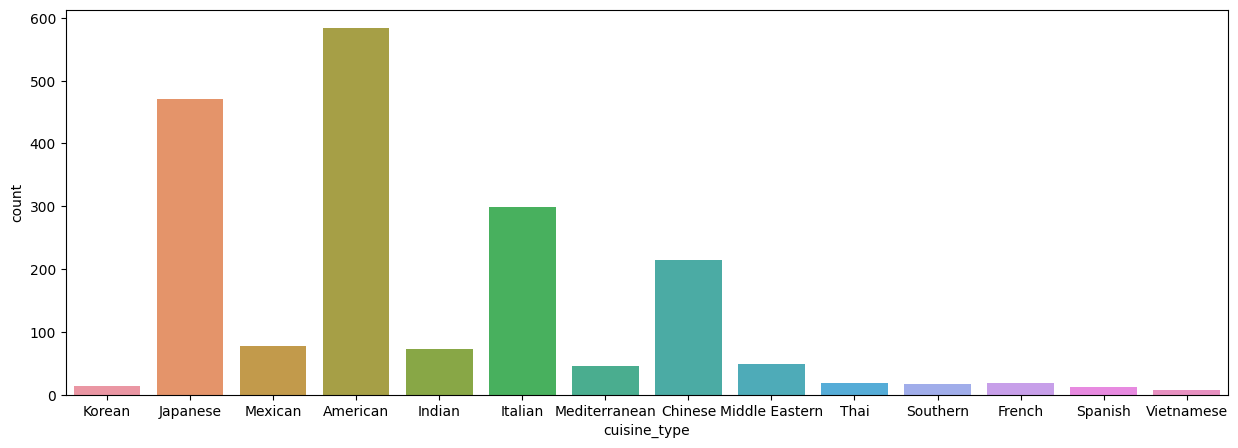

In [ ]:
#Create Countplot for cuisine type
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')

###Observation
There are 14 types of cuisines. These are Korean, Japanese, Mexican, American, Indian, Italian, Mediterranean, Chinese, Middle Eastern, Thai, Southern, French, Spanish and Vietnamese cuisine.

###Histogram for Cost of Order


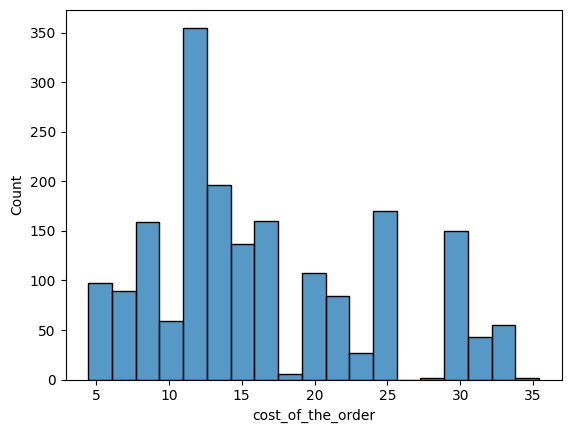

In [ ]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()

###Boxplot for the Cost of the Order

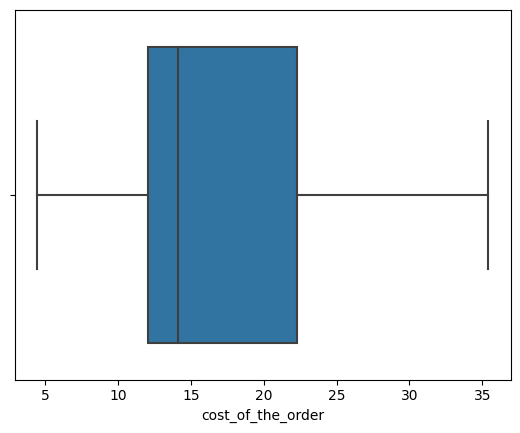

In [ ]:
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

#Observations: Cost of Orders
The histplot is skewed to the left, that is,more towards lower costs, however we note that there is a slight peak at around 25 dollars. The boxplot indicates that the median cost is about 14 dollars, with the orders being right skewed. This implies a a bigger spread above the median. Given that we have two main target markets students and working professionals, it would be good to note if they are the cause of the two peaks with the probability of the well-off professionals being on the right peak and students concentrating on the main and left peak.

In [ ]:
#Day of the Week
df ['day_of_the_week'].nunique()

2

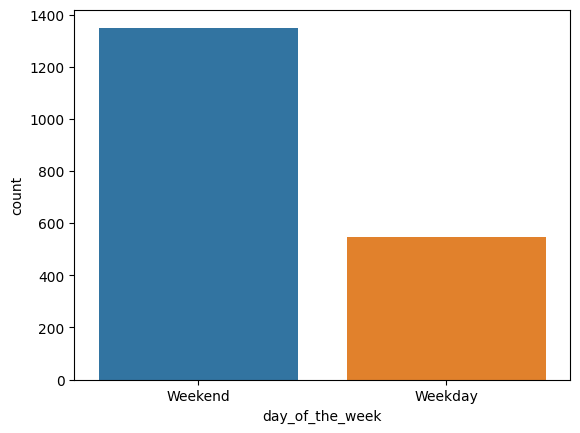

In [ ]:
#Bar for the Day of the Week
sns.countplot(data = df, x = 'day_of_the_week')
plt.show()

###Observations:
There 2 day of the week, weekend and weekday.

In [ ]:
#Rating
df['rating'].nunique()

4

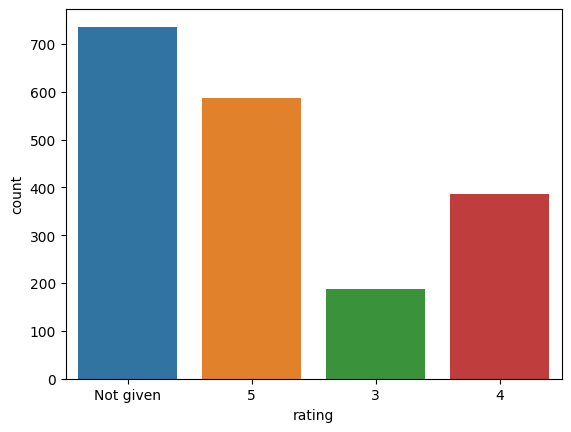

In [ ]:
#Bar graph for rating
sns.countplot(data = df, x = 'rating')
plt.show()

### Food Preparation Time

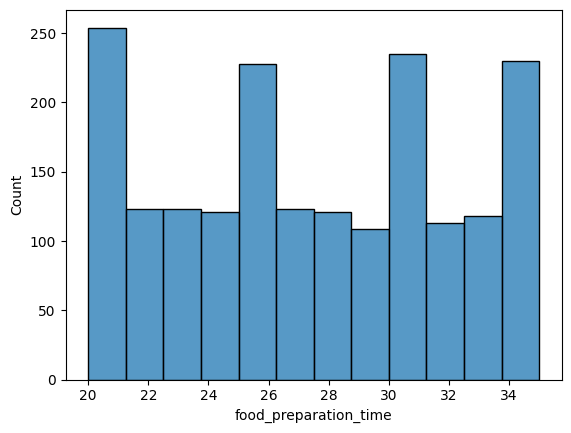

In [ ]:
#Histogram Food Preparation Time
sns.histplot(data = df, x = 'food_preparation_time')
plt.show()

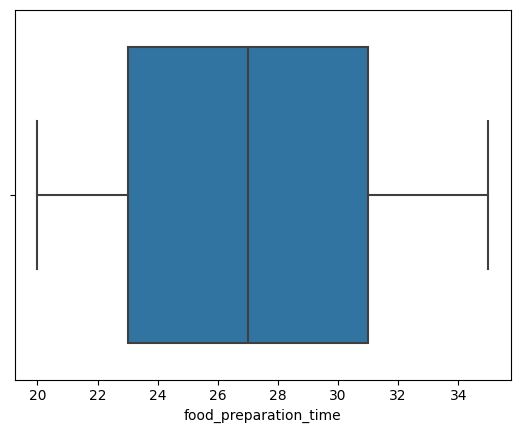

In [ ]:
#Boxplot Food Preparation Time
sns.boxplot(data = df, x = 'food_preparation_time')
plt.show()

###Delivery Time

<function matplotlib.pyplot.show(close=None, block=None)>

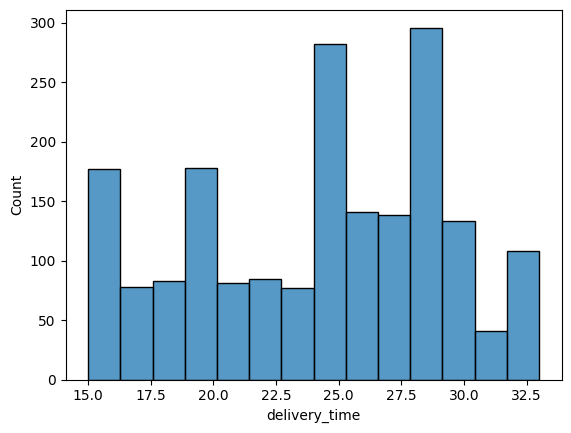

In [ ]:
#Histogram for Delivery Time
sns.histplot(data= df, x= 'delivery_time')
plt.show

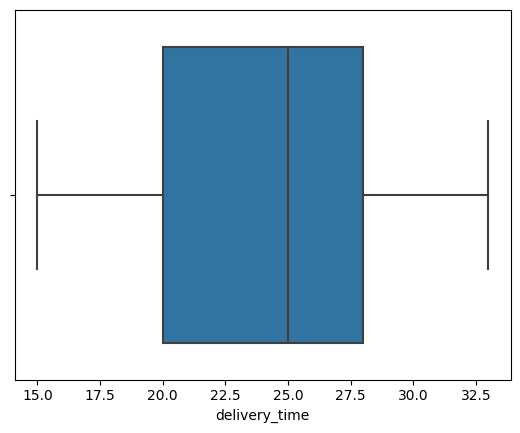

In [ ]:
#Boxplot for Delivery Time
sns.boxplot(data =df , x = 'delivery_time')
plt.show()

###Observation:
The median delivery time is 25 minutes.

##Question 7: Which are the  top 5 Restaurants in term of the number order received?

In [ ]:
#Top 5 Restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

###Observation:
Shake Shack is the leading restaurant with 219 orders, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken & Parm have 132, 119, 96 & 68 orders respectively and together make up the top 5 restaurants in terms of orders processed

##Question 8 : Which is the most popular cuisine on weekends?

In [ ]:
#Get the most popular cuisine on weekends
df_weekend = df [df['day_of_the_week'] == 'Weekend']
df_weekend ['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

###Observations on Cuisine Type:
American Cuisine Type is the most popular during the weekends with a count of 415 orders



##Question 9: What percentage of the orders cost more than 20 dollars?

In [ ]:
#Orders that cost above 20 dollars
df_greater_than_20 = df [df['cost_of_the_order'] >20]
# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])
# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


###Observations:
The number of total orders that cost above 20 dollars is 555.
The percentage of the orders that cost more than 20 dollars is 29.24 %.


###Question 10: What is the mean order delivery time?

In [ ]:
#Get the mean delivery time
mean_del_time = df ['delivery_time'].mean()

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


###Observation:
The average delivery time for this dataset is 24.16 minutes.

###Question 11: The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(5)

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

###Observations:
Customer ID numbers 52832, 47440, and 83287 are the top three customers that will received 20% discount vouchers.

##Multivariate Analysis
###Question 12: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

###Cuisine Vs Cost of the Order

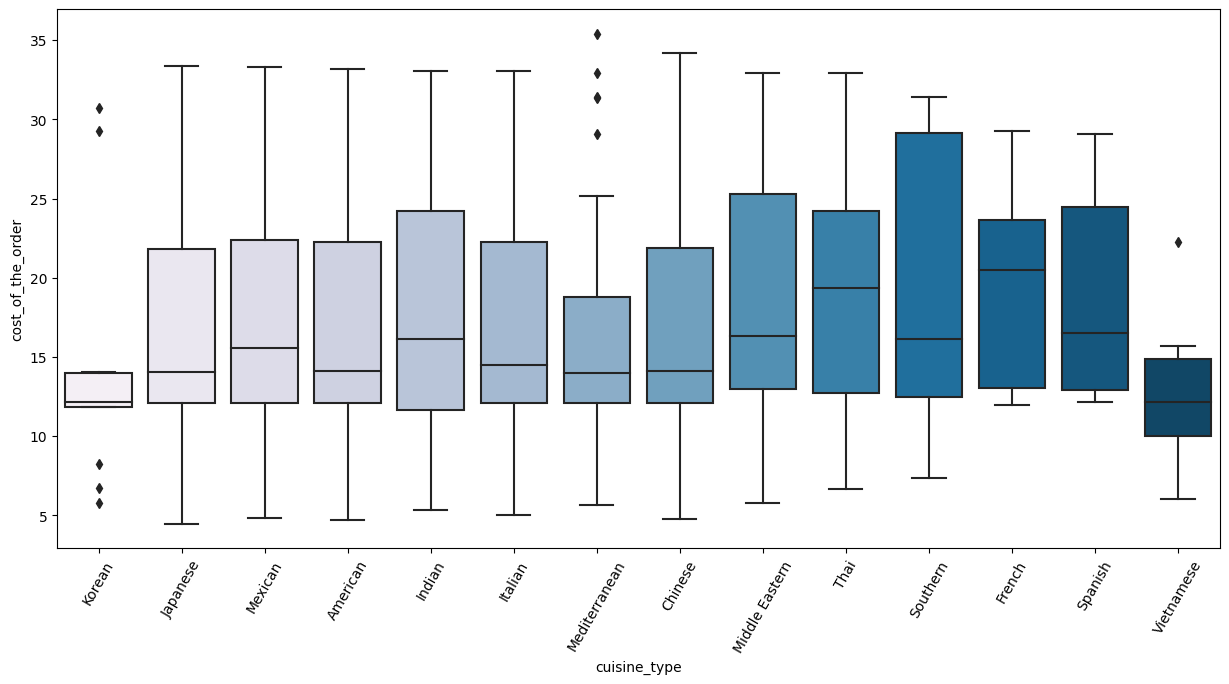

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

Observations:

###Cuisine vs Food Preparation time


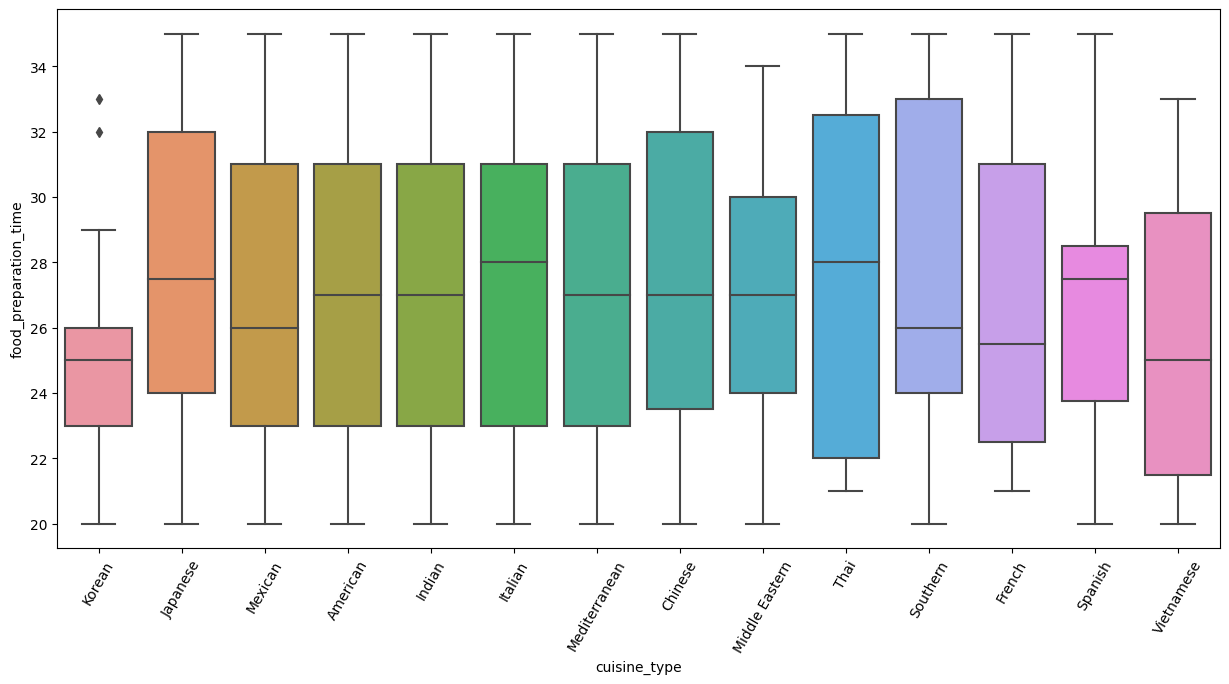

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df)
plt.xticks(rotation = 60)
plt.show()

###Day of the Week vs Delivery time

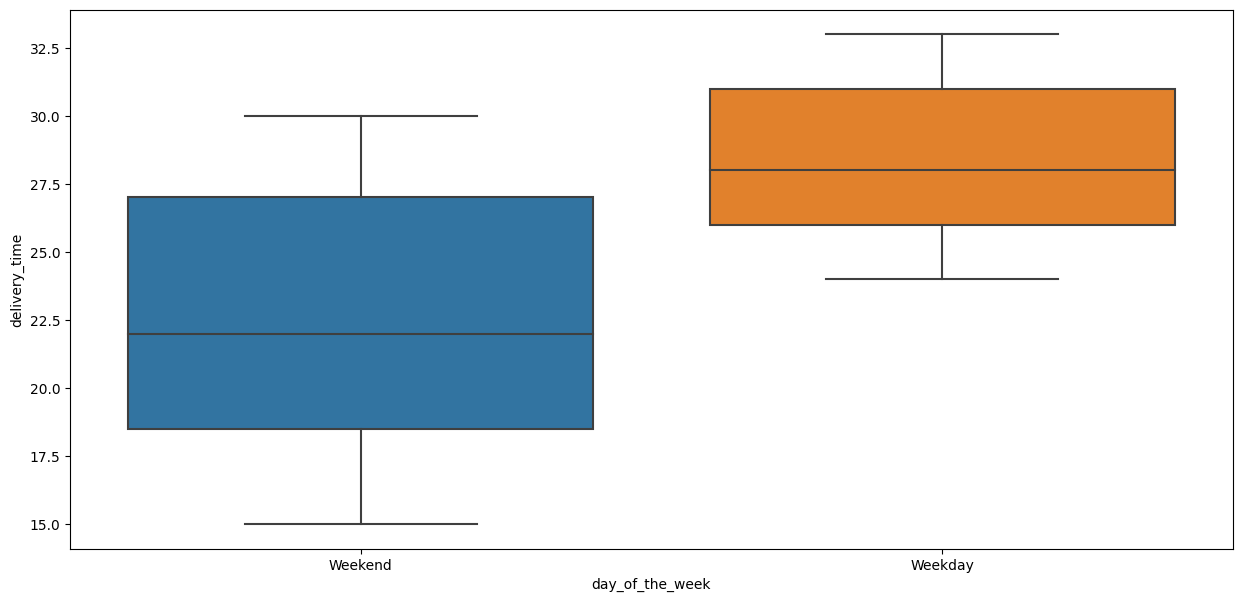

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df)
plt.show()

###Observations on the Day of the Week:

There is higher activity over the weekend than during the other weekdays.

###Run the below code and write your observations on the revenue generated by the restaurants¶

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

###Observation:
Top 5 Food Hub are Shake Shack, The Meatball Shop,               
Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.                              

###Rating vs Delivery time

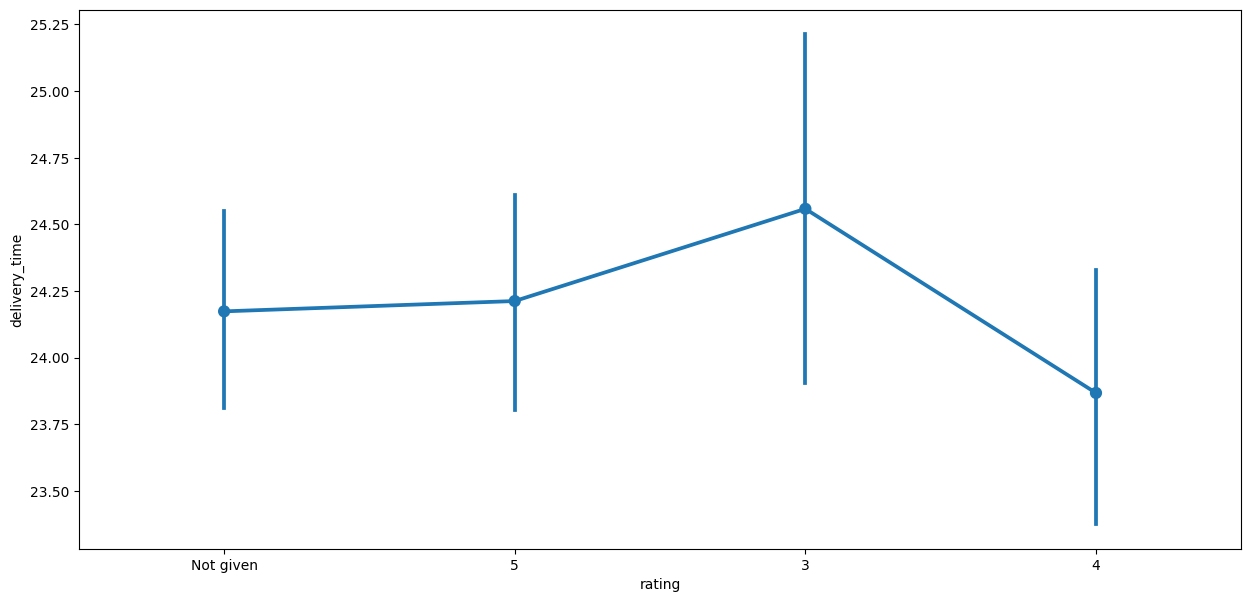

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

###Rating vs Food Preparation Time


<function matplotlib.pyplot.show(close=None, block=None)>

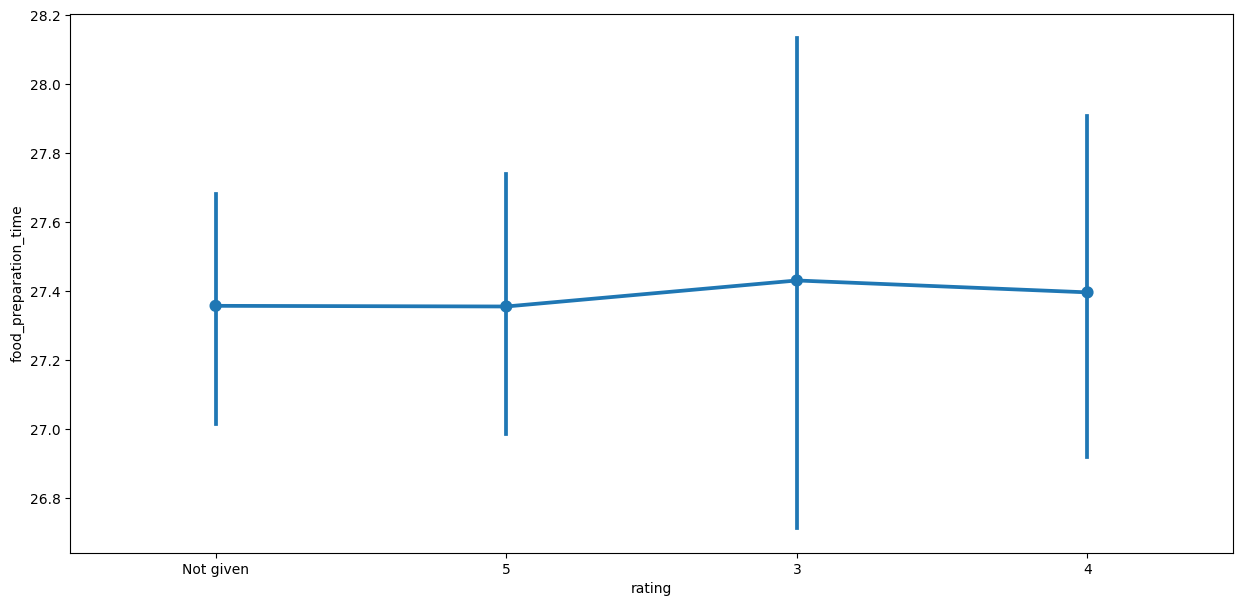

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show

###Rating vs Cost of the order

<function matplotlib.pyplot.show(close=None, block=None)>

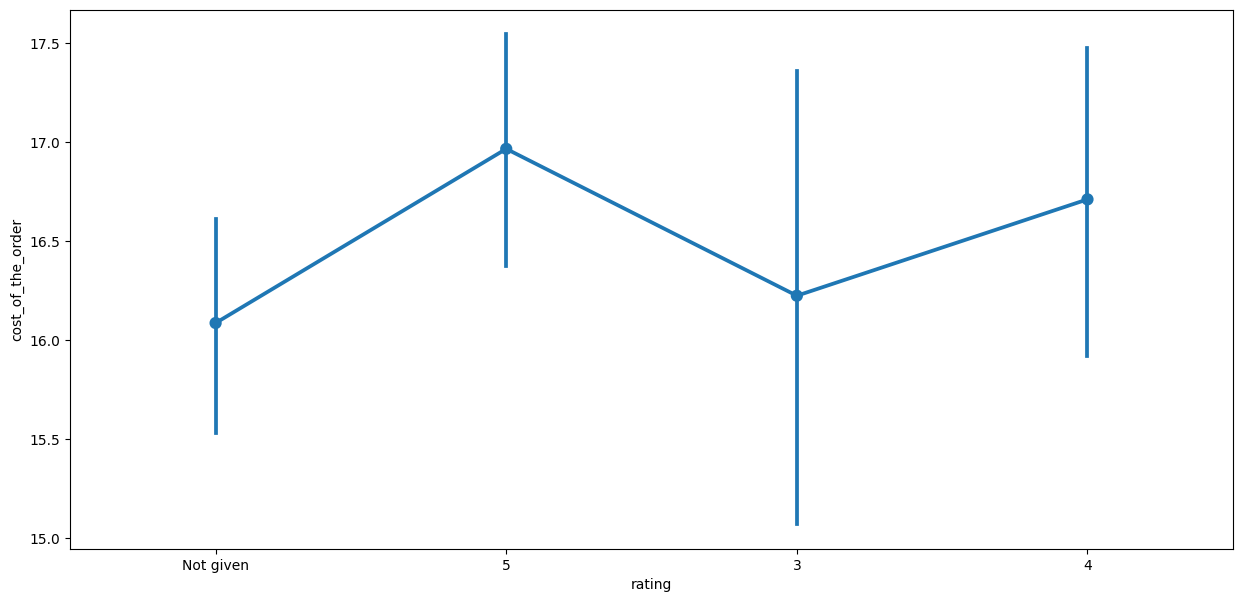

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show

Observation: on average, the cost of the order tends to increase as the rating increases.

###Correlation among variables

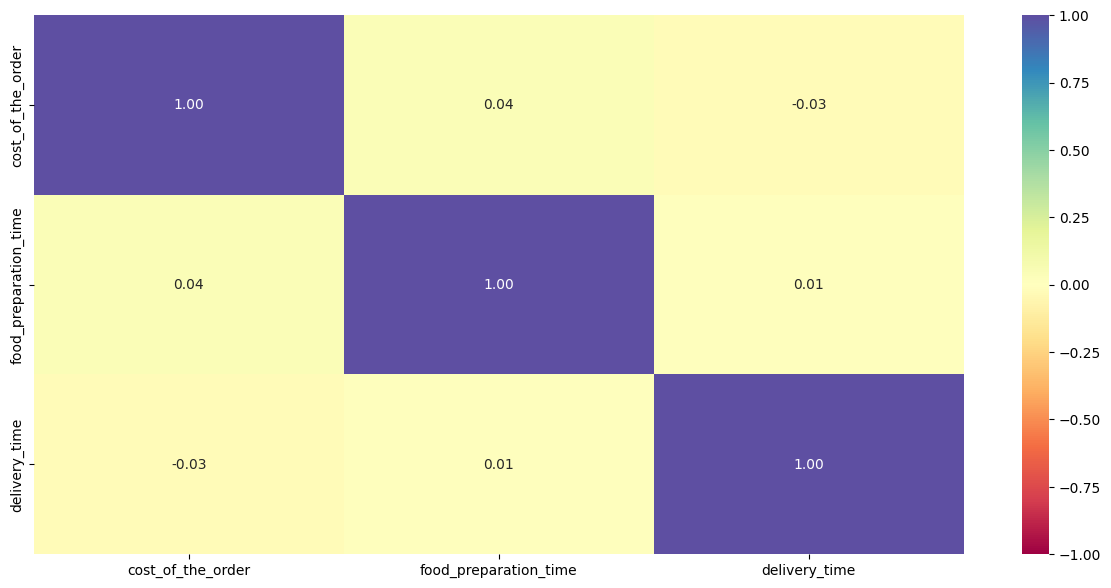

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

###Observation: Heatmap and pairplot:
The heatmap shows very weak correlation between the variables.

##Question 13: The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer¶


In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


Observations:
Four Restaurants namely Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop qualify for the promotional offer.

###Question 14: The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Create a variable to hold the revenues
revenue = 0
income = 0
# Create a Pandas series of the cost of order column
cost = pd.Series(df['cost_of_the_order'])
# Loop through the series calculating the individual income component and adding it to the revenue variable
for i in range(len(cost)):
    if (cost[i] > 5) & (cost[i] < 20):
        income = cost[i]*0.15
    elif (cost[i] > 20):
        income = cost[i]*0.25
    else:
        income = 0
    revenue = revenue + income


In [ ]:
print('Net revenue generated is: ',round(revenue,2),'assuming no commission charged for orders with cost below $5')

Net revenue generated is:  6166.3 assuming no commission charged for orders with cost below $5


###Observations:
Given the market differentiation in price, FoodHub collected a total of $ 6163.39 for the orders given

###Question 15: The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders that have more than 60 minutes of total delivery time
total_orders = len(df)
orders_above_60_minutes = len(df[df['total_time'] > 60])
percentage_above_60_minutes = (orders_above_60_minutes / total_orders) * 100

print("Percentage of orders with more than 60 minutes of total delivery time:", round(percentage_above_60_minutes, 2), '%')

Percentage of orders with more than 60 minutes of total delivery time: 10.54 %


###Observation:
10.54% percentage of orders with more than 60 minutes of delivery time.

###Question 16:
The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
avr_del_time = df.groupby('day_of_the_week')[['delivery_time']].agg(['mean','sum','count','std'])
avr_del_time

delivery_time                       
                         mean    sum count       std
day_of_the_week                                     
Weekday             28.340037  15502   547  2.891428
Weekend             22.470022  30357  1351  4.628938

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes


###Observation:
The average delivery time during the weekend is 22 minutes against the weekday delivery time of 28 minutes.

##Conclusion and Recommendations

###Question 17:
What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

##Conclusions:



1.   Regardless of the day of the week, the popularity ranking of cuisines remains consistent, even though there is a noticeable increase in demand during the weekends.
2.  The demand for the top 5 Restaurant namely Shake Shack, The Meatball Shop,	Blue Ribbon Sushi, Blue Ribbon Fried Chicken, RedFarm Broadway, is notable.
3. In comparison to preparation time, delivery time shows more variation, indicating that delivery time is the major contributing factor to the total preparation time.



##Recommendations:

1.   On promotional offers the organization will have to consider a tie-breaker for cases where customers have the same score. A decision will be required to either reward all of them, considering the financial implication, or factor other aspects to distinguish the customers such as the amount spent by each one of the customers in a tie.
2.   Given that we have two main target markets students and working professionals, it would be good to note if they are the cause of the two peaks with the probability of the well-off professionals being on the right peak and students concentrating on the main and left peak.
3. To improve on total order time (the total time taken between the customer placing the order and receiving their delivery) a review on how to bring down delivery time can be assessed to improve on overall service.
